# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [9]:
import numpy as np
prezzi = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])

#1
media = prezzi.mean()
print("Prezzo medio:", media)

#2
sopra_media = prezzi[prezzi > media]
print("Libri con prezzo > media:", sopra_media)

#3
sconto = prezzi.copy()
#per lo sconto faccio riferimento all'array originale
sconto[prezzi > media] *=0.9
print("Prezzi scontati:", sconto)



Prezzo medio: 18.983000000000004
Libri con prezzo > media: [22.5  31.2  24.9  19.99 27.3 ]
Prezzi scontati: [14.99  20.25   9.75  18.    28.08  12.8   22.41   8.4   17.991 24.57 ]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

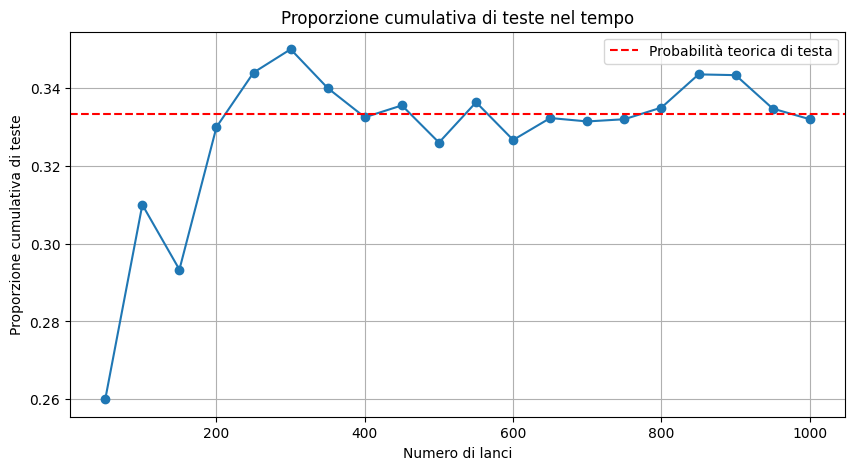

In [10]:
import matplotlib.pyplot as plt
n_lanci = 1000
prob_testa = 1/3  # Doppia probabilità di croce => testa = 1/3, croce = 2/3

# Simulazione dei lanci: 1 = testa, 0 = croce
#se non specifico p = [] utilizza probabilità uniforme (es: 3 possibilità --> p=1/3)
lanci = np.random.choice([1, 0], size=n_lanci, p=[prob_testa, 1-prob_testa])

#2
# Calcolo della proporzione cumulativa ogni 50 lanci
passo = 50
proporzioni = [np.mean(lanci[:i]) for i in range(passo, n_lanci+1, passo)]

#cicla su array[50, 100, 150, ... , 1000] 
#per ogni i dell'array: calcola la media dei primi i valori dei lanci 
#caso i=50
#lanci=[0, 1, 1, 1, 0, 0, 0, ..., 0, 1] 50 valori
#la media mi da la proporzione di teste
#quindi proporzioni è un array con [percentuali] = [0.30, 0.32, 0.34, 0.33, ...]

# Numeri di lanci per l'asse x
lanci_cumulativi = np.arange(passo, n_lanci+1, passo)
#arange restituisce un'array numpy

# Grafico
plt.figure(figsize=(10,5))
plt.plot(lanci_cumulativi, proporzioni, marker='o')
plt.axhline(prob_testa, color='red', linestyle='--', label='Probabilità teorica di testa')
plt.title('Proporzione cumulativa di teste nel tempo')
plt.xlabel('Numero di lanci')
plt.ylabel('Proporzione cumulativa di teste')
plt.legend()
plt.grid(True)
plt.show()
#all'aumentare dei lanci la probabilità cumulativa tende alla teorica

## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [11]:
def mat_normalizzata(mat):
    # Calcola la media della matrice
    media = np.mean(mat)
    # Calcola la deviazione standard della matrice
    std = np.std(mat)
    # Normalizza la matrice
    mat_norm = (mat - media) / std
    
    return mat_norm

# Test della funzione
# Creiamo una matrice 6x10 con valori campionati da una distribuzione normale con media=5 e std=2
np.random.seed(0)  # Per rendere l'esempio riproducibile
mat = np.random.normal(loc=5, scale=2, size=(6, 10))

# Normalizziamo la matrice
mat_norm = mat_normalizzata(mat)

# Stampiamo i risultati
print("Matrice originale:\n", mat)
print("\nMatrice normalizzata:\n", mat_norm)

Matrice originale:
 [[ 8.52810469  5.80031442  6.95747597  9.4817864   8.73511598  3.04544424
   6.90017684  4.69728558  4.7935623   5.821197  ]
 [ 5.28808714  7.90854701  6.52207545  5.24335003  5.88772647  5.66734865
   7.98815815  4.58968347  5.6261354   3.29180852]
 [-0.10597963  6.30723719  6.7288724   3.51566996  9.53950925  2.09126865
   5.09151703  4.6256323   8.06555843  7.93871754]
 [ 5.30989485  5.75632504  3.2244285   1.03840706  4.3041757   5.31269794
   7.46058136  7.4047597   4.22534637  4.3953945 ]
 [ 2.90289407  2.15996413  1.58745962  8.90155079  3.98069564  4.1238514
   2.49440928  6.55498071  1.7722043   4.57451944]
 [ 3.20906688  5.773805    3.97838972  2.63873563  4.94363554  5.85666374
   5.13303444  5.6049438   3.73135581  4.27451767]]

Matrice normalizzata:
 [[ 1.59211176  0.305225    0.85113789  2.04202918  1.68977326 -0.99443723
   0.82410594 -0.21514976 -0.1697294   0.31507675]
 [ 0.06357207  1.29982368  0.64572944  0.04246649  0.34646329  0.24249588
   1.33

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


In [12]:
import pandas as pd
#caso in cui il file sia su github
url = "https://raw.githubusercontent.com/lauranenzi/ProgrammingLab_II/refs/heads/main/esami/data/books.csv"
df = pd.read_csv(url)
df.head()
#caso in cui copio il file nella cartella su cui sto lavorando in VsCode
#import pandas as pd
#df = pd.read_csv("books.csv")
#df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
#1
df['engagement_score'] = df['average_rating'] * np.log(1 + df['ratings_count'])
df['engagement_score']

0       66.749582
1       68.118950
2       54.149575
3       63.657547
4       57.582479
          ...    
9995    39.889587
9996    40.120433
9997    39.805992
9998    34.057371
9999    36.491716
Name: engagement_score, Length: 10000, dtype: float64

In [14]:
#2
indice = df['engagement_score'].idxmax()
max_libro = df.loc[indice]
max_libro

book_id                                                                      2
goodreads_book_id                                                            3
best_book_id                                                                 3
work_id                                                                4640799
books_count                                                                491
isbn                                                                 439554934
isbn13                                                         9780439554930.0
authors                                            J.K. Rowling, Mary GrandPré
original_publication_year                                               1997.0
original_title                        Harry Potter and the Philosopher's Stone
title                        Harry Potter and the Sorcerer's Stone (Harry P...
language_code                                                              eng
average_rating                                      

In [15]:
#3
high_rating = df[df['average_rating'] > 4.5]
print(high_rating)

      book_id  goodreads_book_id  best_book_id   work_id  books_count  \
17         18                  5             5   2402163          376   
23         24                  6             6   3046572          332   
24         25             136251        136251   2963218          263   
26         27                  1             1  41335427          275   
134       135              62291         62291   1164465          175   
...       ...                ...           ...       ...          ...   
9568     9569           32075671      32075671  49638190           36   
9711     9712           17333174      17333174  24064358           14   
9780     9781            6081686       6081686   6258393           15   
9805     9806            6801614       6801614   7008132           18   
9922     9923             228200        228200   9813455           26   

            isbn        isbn13                                  authors  \
17    043965548X  9.780440e+12  J.K. Rowling, Ma

Text(0, 0.5, 'Titolo del libro')

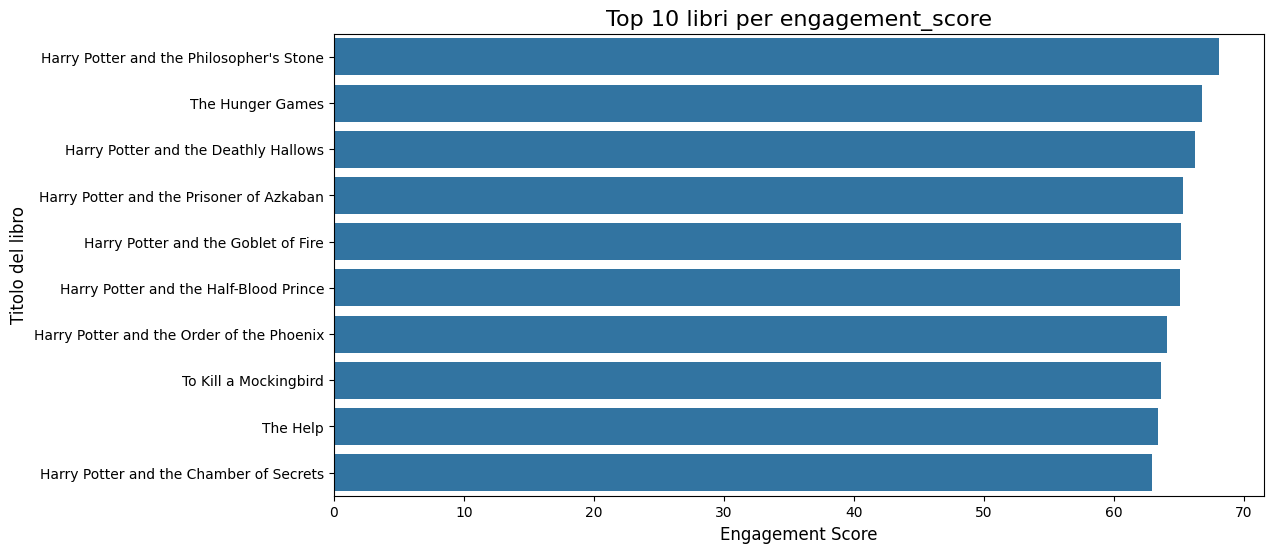

In [24]:
#4
import matplotlib.pyplot as plt
import seaborn as sns
top10_libri= df.sort_values(by='engagement_score', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='engagement_score', y='original_title', data=top10_libri)
plt.title("Top 10 libri per engagement_score", fontsize=16)
plt.xlabel("Engagement Score", fontsize=12)
plt.ylabel("Titolo del libro", fontsize=12)

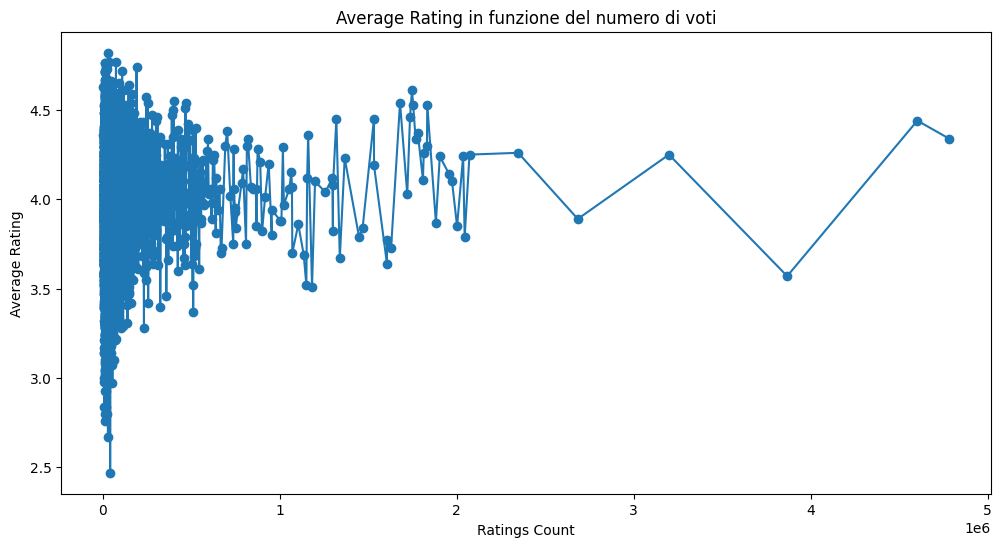

In [ ]:
#Crea un grafico a linee della average_rating, 
#ordinando i libri per ratings_count crescente.
df_sorted = df.sort_values(by='ratings_count')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['ratings_count'], df_sorted['average_rating'], marker='o')
plt.title("Average Rating in funzione del numero di voti")
plt.xlabel("Ratings Count")
plt.ylabel("Average Rating")
plt.show()

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


In [17]:
import pandas as pd
import matplotlib.pyplot as pl

url = "https://raw.githubusercontent.com/lauranenzi/ProgrammingLab_II/refs/heads/main/esami/data/adult_con_titoli.csv"
data = pd.read_csv(url)
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
#1
data.shape
print("Righe e colonne:", data.shape)

Righe e colonne: (32561, 15)


In [19]:
#2
print("\nValori mancanti per colonna:")
data.isna().sum()


Valori mancanti per colonna:


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [20]:
#3
#data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
#senza inplace bisogna riassegnare
#data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
for col in ["workclass", "occupation", "native-country"]:
    moda=data[col].mode()[0]
    data[col] = data[col].fillna(moda)


In [21]:
#4
#età media per sesso
grouped = data.groupby('sex')
eta_media = grouped['age'].mean()
print("\nEtà media per sesso:", eta_media)



Età media per sesso: sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


In [ ]:
#5
#percentuale di reddito >50K per sesso
print(data['income'].unique())

grouped_2 = data.groupby("sex")
reddito = grouped_2['income'].apply(

    lambda x: (x == " >50K").mean() * 100
    #condizione logica True o False
)
reddito


[' <=50K' ' >50K']


sex
Female    10.946059
Male      30.573658
Name: income, dtype: float64

In [ ]:
#4
ds = ds.dropna(subset=["IMDB_Rating", "Gross", "main_genre"])
grouped1 = ds.groupby('main_genre')
media_1 = grouped1[['IMDB_Rating', 'Gross']].mean()
print(media_1)



            IMDB_Rating         Gross
main_genre                           
Action         7.948227  1.419631e+08
Adventure      7.936066  8.645499e+07
Animation      7.922388  1.279675e+08
Biography      7.925316  6.012873e+07
Comedy         7.900781  3.253759e+07
Crime          8.021505  3.419123e+07
Drama          7.949145  3.867728e+07
Family         7.800000  2.195553e+08
Film-Noir      8.050000  1.278626e+06
Horror         7.930000  7.358577e+07
Mystery        8.066667  3.043953e+07
Thriller       7.800000  1.755074e+07
Western        8.350000  1.455538e+07


In [56]:
#6
data["age_group"] = pd.cut(
    data["age"],
    bins=[0, 29, 50, 100],
    labels=["<30", "30-50", ">50"]
)
data['age_group']


0        30-50
1        30-50
2        30-50
3          >50
4          <30
         ...  
32556      <30
32557    30-50
32558      >50
32559      <30
32560      >50
Name: age_group, Length: 32561, dtype: category
Categories (3, object): ['<30' < '30-50' < '>50']

C:\Users\conta\AppData\Local\Temp\ipykernel_14252\1655095007.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_3 = data.groupby('age_group')


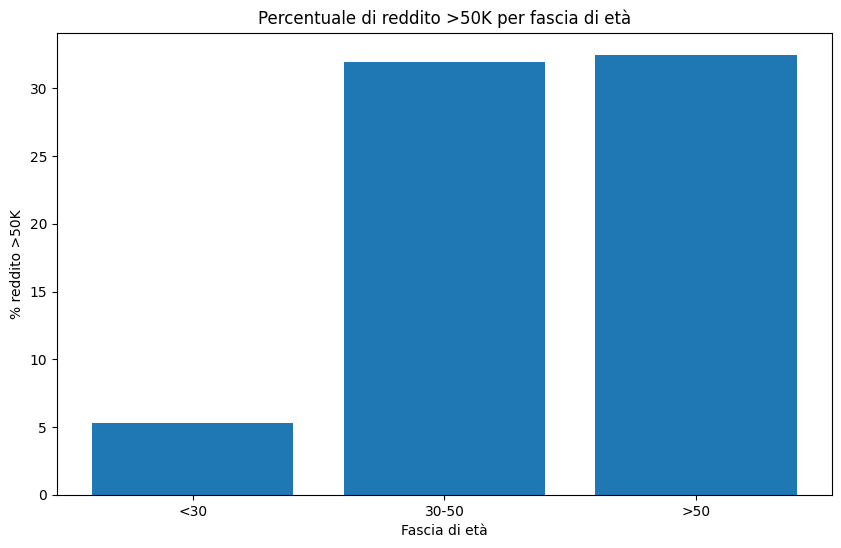

In [ ]:
#7 a
grouped_3 = data.groupby('age_group')
reddito_eta = grouped_3['income'].apply(
    lambda x: (x == " >50K").mean() * 100
)
reddito_eta #è una series
plt.figure(figsize=(10,6))
plt.bar(reddito_eta.index, reddito_eta.values) #metodo con matplotlib

#alternativa
#Nome_Series.plot(kind="bar") 

plt.ylabel("% reddito >50K")
plt.xlabel("Fascia di età")
plt.title("Percentuale di reddito >50K per fascia di età")
plt.show()

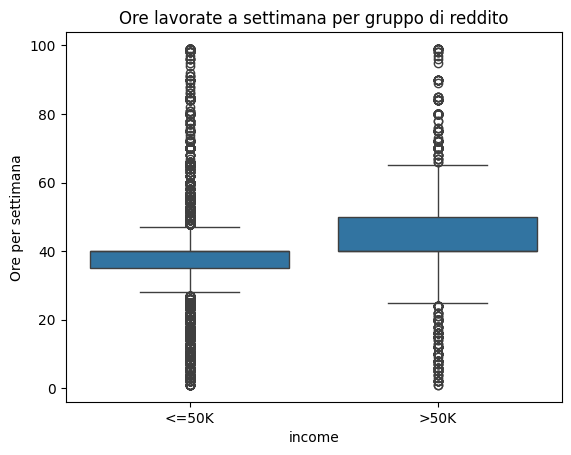

In [67]:
#7 b
#un boxplot delle ore lavorate (hours-per-week) per gruppo reddito (<=50, >50).
#puliamo la colonna dagli spazi
data["income"] = data["income"].str.strip()

import seaborn as sns

sns.boxplot(x="income", y="hours-per-week", data=data)

plt.title("Ore lavorate a settimana per gruppo di reddito")
plt.suptitle("")  # rimuove il titolo automatico
plt.ylabel("Ore per settimana")
plt.show()

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

Parametri stimati: a = 2.383, b = 1.477


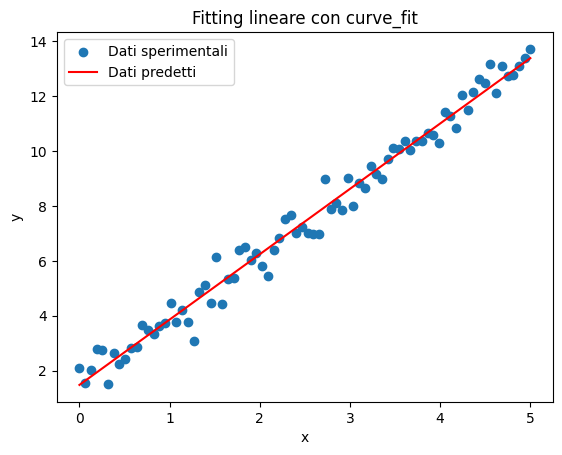

MAE: 0.369
RMSE: 0.473


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(0)
x = np.linspace(0, 5, 80) 
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

#funzione lineare da fittare
def retta (x, a, b):
    return a * x + b 

# 3. Fit della retta
params, cov = curve_fit(retta, x, y)
a, b = params

#1
print(f"Parametri stimati: a = {a:.3f}, b = {b:.3f}")

#2
#plot dei punti originali e della retta stimata

#valori predetti dalla retta fittata
y_fit = retta(x, a, b)
#y_fit = a * x + b

#plot
plt.scatter(x, y, label = "Dati sperimentali")
plt.plot(x, y_fit, color="red", label="Dati predetti")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Fitting lineare con curve_fit")
plt.show()

#3
mae = np.mean(np.abs(y - y_fit))
rmse = np.sqrt(np.mean((y - y_fit)**2))
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")